1. Primero toca convertir la imagen en blanco y negro
2. Despues se puede contrastar con la real (https://www.electroschematics.com/pcb-defects-detection-opencv/)


(<AxesSubplot:title={'center':'Imagen'}>,
 Text(0.5, 1.0, 'Imagen'))

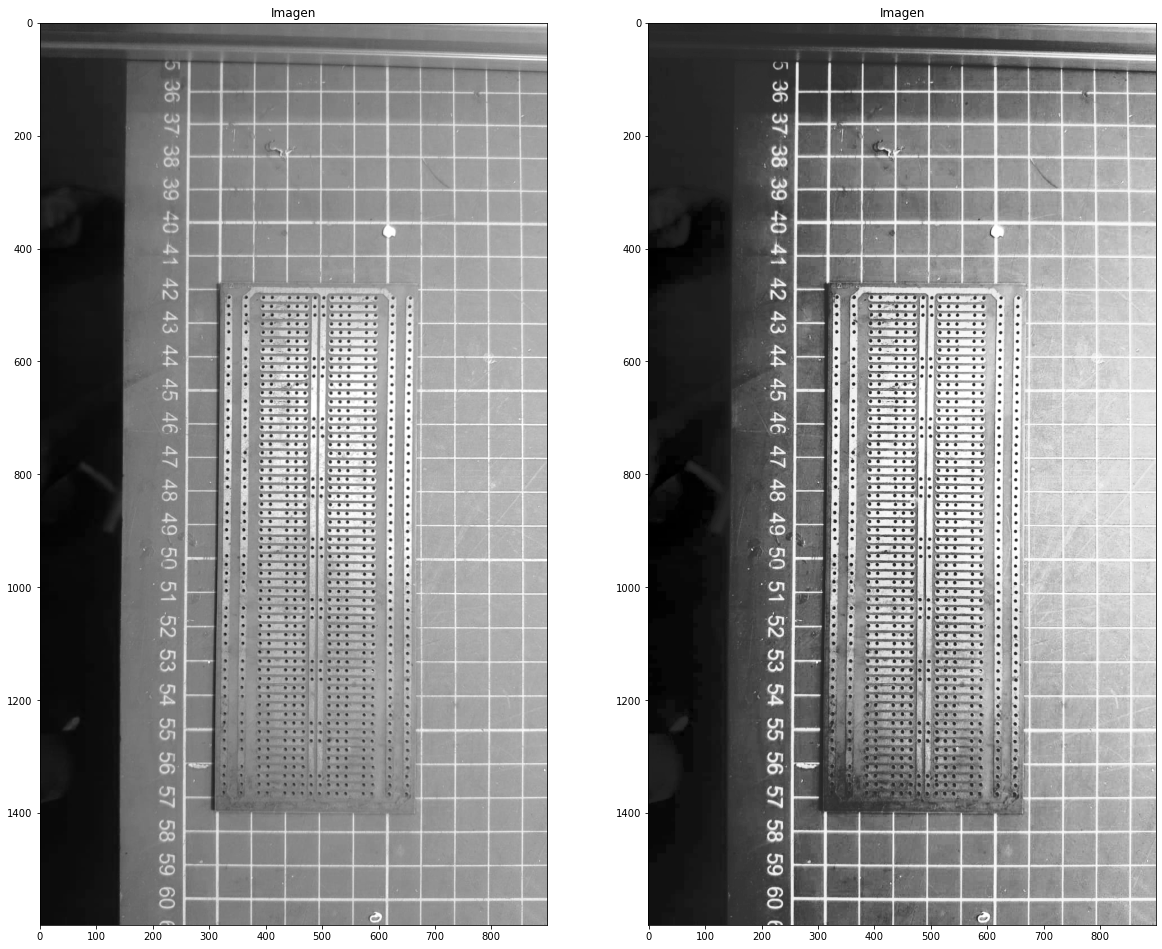

In [2]:
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

# SE CARGA LA IMAGEN EN ESCALA DE GRISES
img = cv2.imread("./TestPics/PCB11.jpg",1)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)



equ = cv2.equalizeHist(hsv[:,:,2])

plt.figure(1,figsize=(20, 20))
plt.subplot(121), plt.imshow(hsv[:,:,2], cmap='gray'), plt.title('Imagen')
plt.subplot(122), plt.imshow(equ, cmap='gray'), plt.title('Imagen')

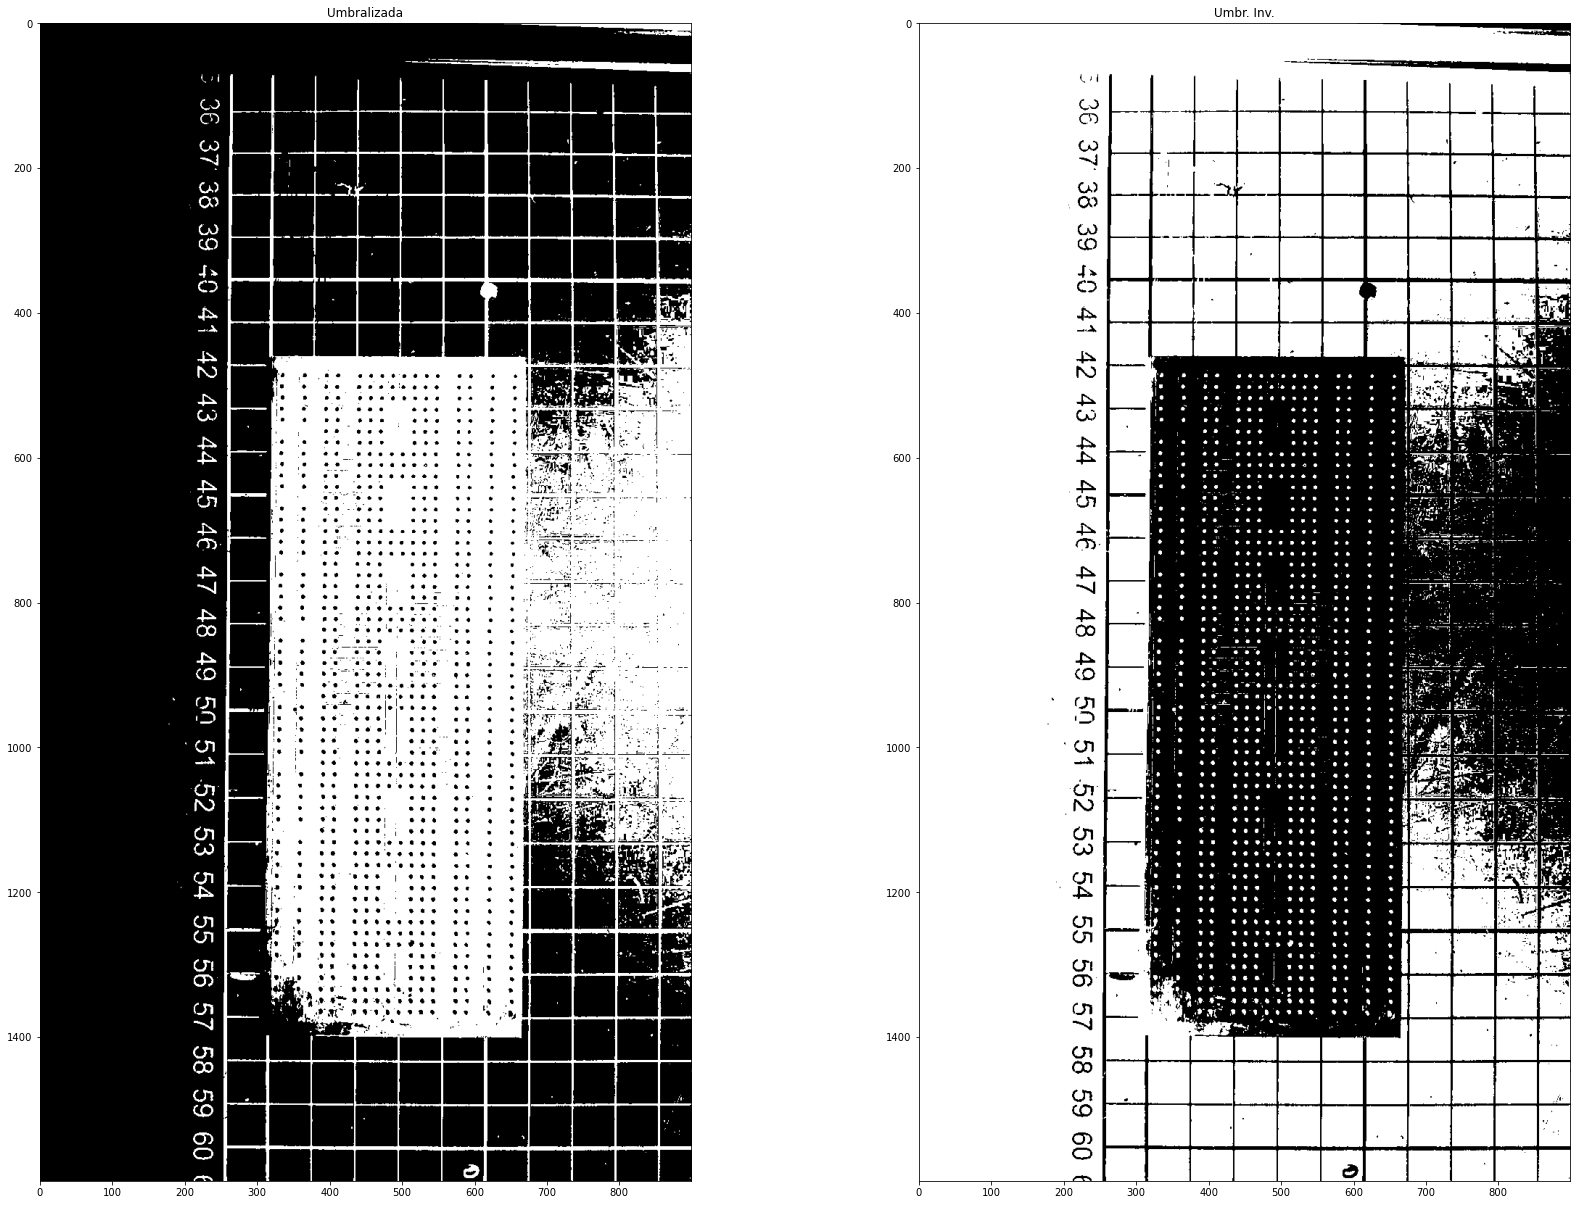

In [3]:
# UMBRALIZACION DE UNA IMAGEN

# SE CARGAN LAS IMAGENES 
img1 = cv2.imread("./TestPics/PCB11.jpg",0)

width, height = img1.shape[:2]
img_umbral = np.zeros((width,height), np.uint8)
img_umbral_inv = np.zeros((width,height), np.uint8)

#DIVISION POR UNA CONSTANTE
C=5 #Valor de la constante
IGMax=0
IGmin=1000000

#DIVISION POR UNA CONSTANTE
H=116 #Valor de la constante

for i in range(width):
    for j in range(height):
        if img1[i,j] < H : 
            img_umbral[i,j] = 0
            img_umbral_inv[i,j] = 255
        else : 
            img_umbral[i,j] = 255
            img_umbral_inv[i,j] = 0
        if img1[i,j] > IGMax: IGMax = img1[i,j]
        if img1[i,j] < IGmin: IGmin = img1[i,j]


#Visualizacion resulatado 
plt.figure(1,figsize=(25, 25))
plt.subplot(121), plt.imshow(img_umbral, cmap='gray'), plt.title('Umbralizada')
plt.subplot(122), plt.imshow(img_umbral_inv, cmap='gray'), plt.title('Umbr. Inv.')

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()

Adaptive treshold (gaussian)
Otsu's method


(<AxesSubplot:title={'center':'Umbr. Inv.'}>,
 Text(0.5, 1.0, 'Umbr. Inv.'))

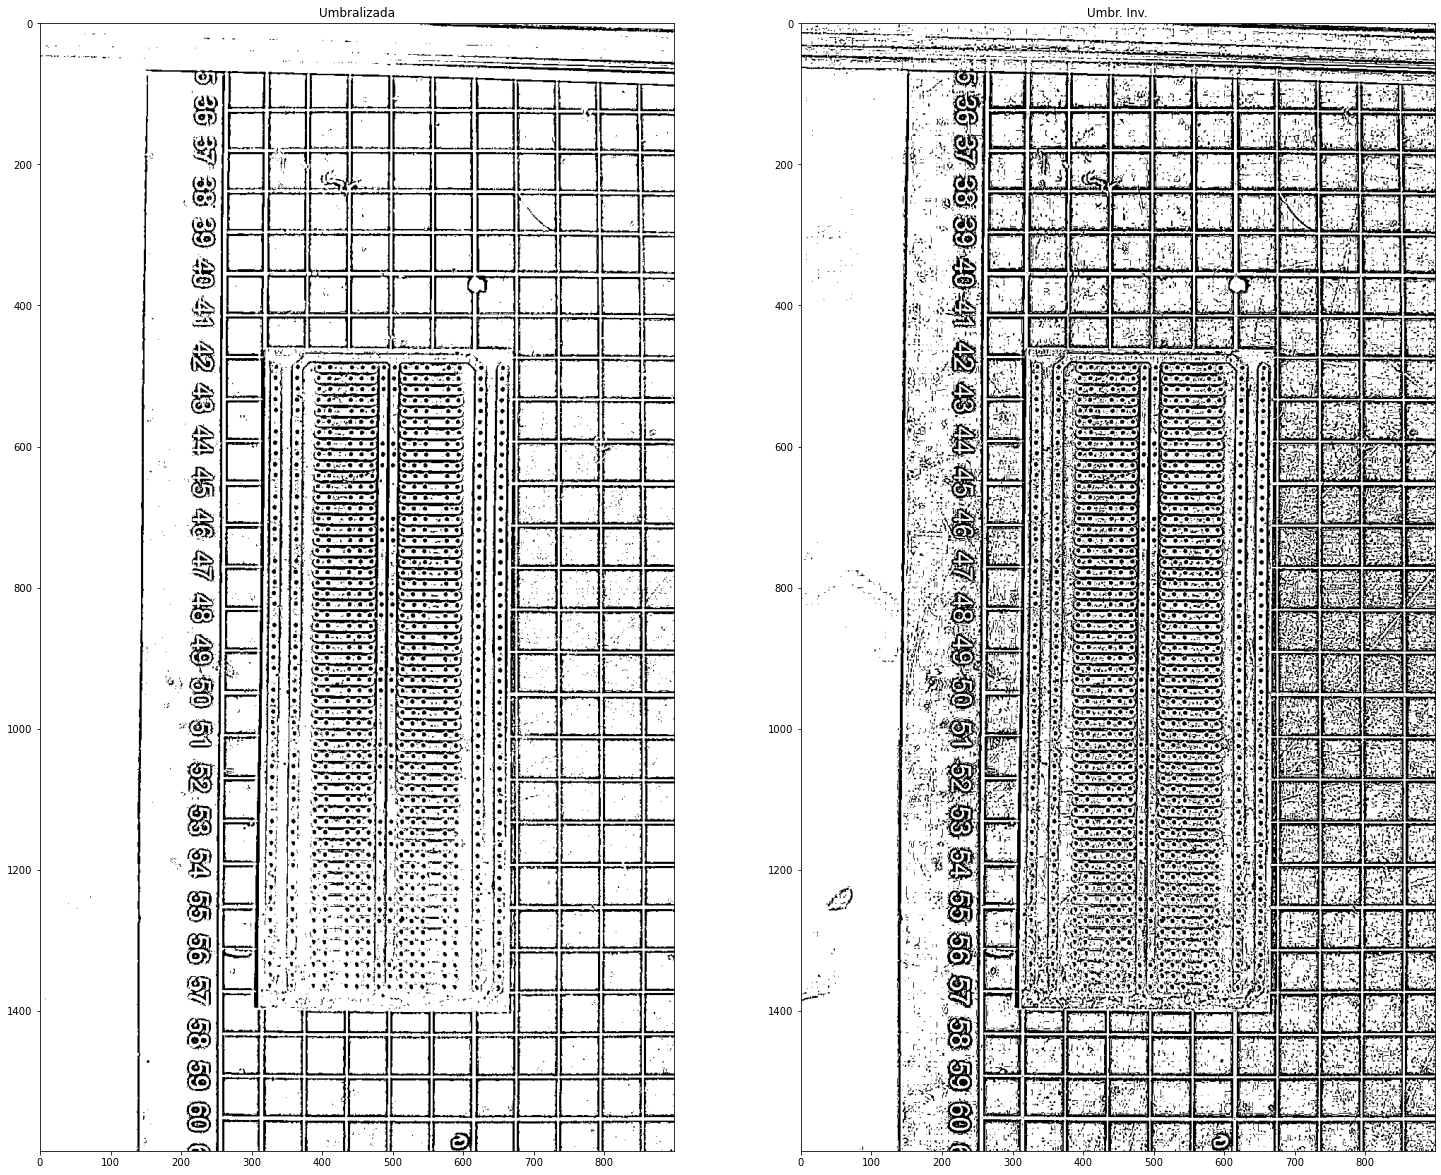

In [4]:
#Adaptative thersholding
# SE CARGAN LAS IMAGENES 
img2 = cv2.imread("./TestPics/PCB11.jpg",0)
img2 = cv2.medianBlur(img2,1)

th2 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,9,8)
#Gaussiano
th3 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

nlbw = cv2.medianBlur(th2, 7)

blur = cv2.GaussianBlur(img2,(1,1),0)
ret3,th4 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(2,figsize=(25, 25))
plt.subplot(121), plt.imshow(th2, cmap='gray'), plt.title('Umbralizada')
plt.subplot(122), plt.imshow(th3, cmap='gray'), plt.title('Umbr. Inv.')



[ WARN:0@14.141] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/home/user/Documents/UN/TIA/Proyecto/PCBMillQualityControl/TestPics/PCB1.jpg'): can't open/read file: check file path/integrity


(<AxesSubplot:title={'center':'Umbralizada'}>,
 Text(0.5, 1.0, 'Umbralizada'))

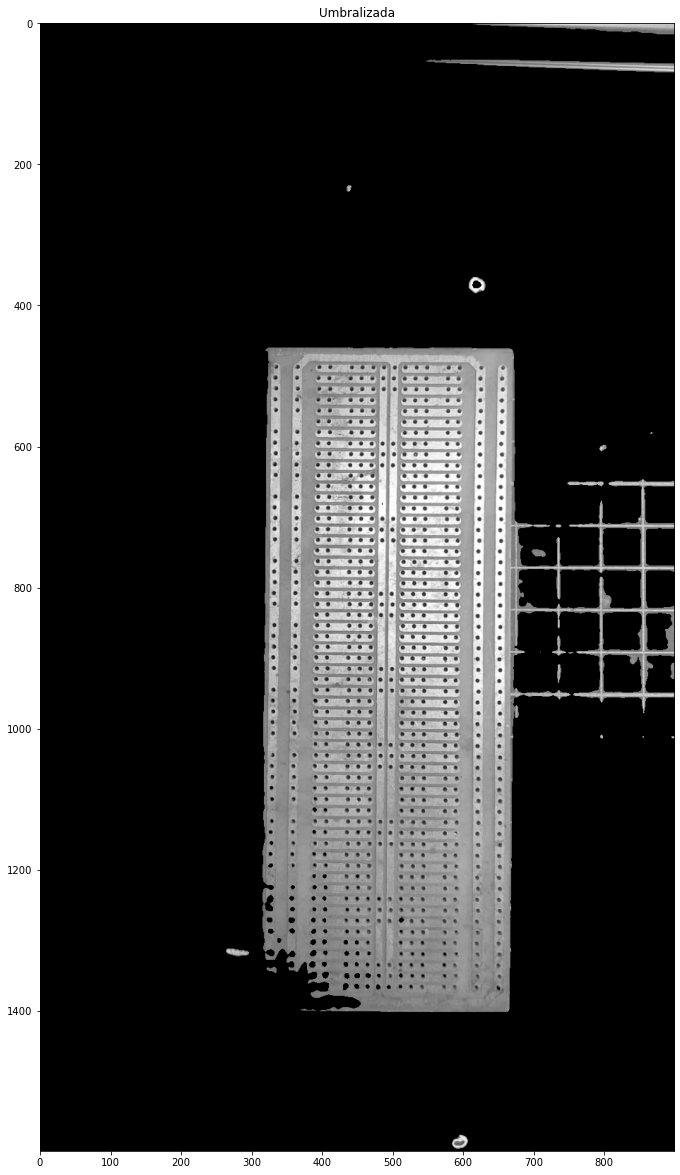

In [6]:
img2 = cv2.imread('/home/user/Documents/UN/TIA/Proyecto/PCBMillQualityControl/TestPics/PCB1.jpg',1)
img2 = cv2.imread("./TestPics/PCB11.jpg",1)
bags_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
bags=img2
blur = cv2.blur(bags,(5,5))
blur0=cv2.medianBlur(blur,5)
blur1= cv2.GaussianBlur(blur0,(5,5),0)
blur2= cv2.bilateralFilter(blur1,9,75,75)
low_blue = np.array([120, 60, 60])
high_blue = np.array([250, 250, 250])
mask2 = cv2.inRange(blur2, low_blue, high_blue)
res = cv2.bitwise_and(img2,img2, mask= mask2)
plt.figure(4,figsize=(25, 25))
plt.subplot(121), plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2GRAY), cmap='gray'), plt.title('Umbralizada')

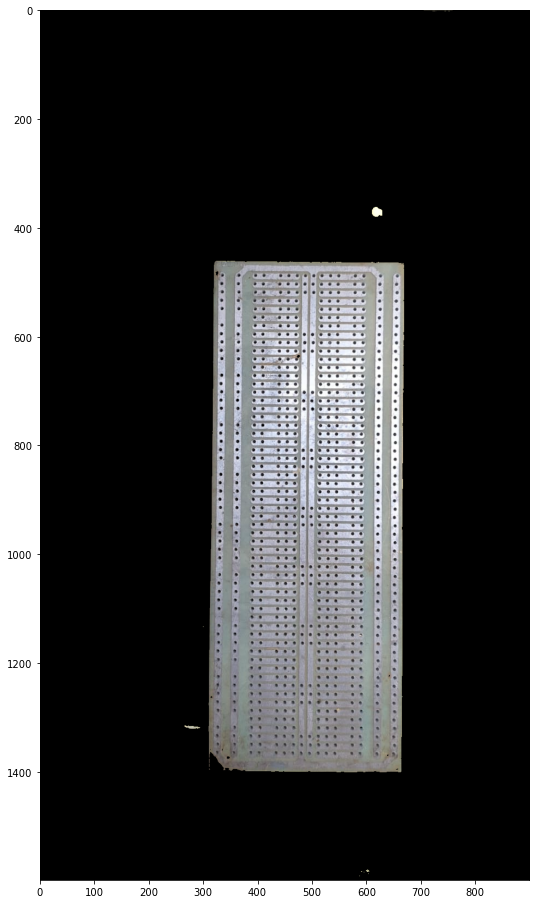

In [5]:
#Segmentacion de Color

img2 = cv2.imread("./TestPics/PCB11.jpg",1)
bags_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
bags=img2

#refer to hue channel (in the colorbar)
lower_mask = bags_hsv[:,:,0] > 0.01#refer to hue channel (in the colorbar)
upper_mask = bags_hsv[:,:,0] < 0.1#refer to transparency channel (in the colorbar)
saturation_mask = bags_hsv[:,:,1] < 64
 
#mask = upper_mask*lower_mask*saturation_mask
# saturation_mask = cv2.cvtColor(saturation_mask, cv2.COLOR_HSV2BGR)
# ret, saturation_mask = cv2.threshold(saturation_mask, 0.05 * saturation_mask.max(), 255, 0)
# mask = cv2.bitwise_not(saturation_mask)
mask = saturation_mask
red = bags[:,:,0]*mask
green = bags[:,:,1]*mask
blue = bags[:,:,2]*mask
bags_masked = np.dstack((red,green,blue))
plt.figure(3,figsize=(16, 16))
plt.imshow(bags_masked)
#plt.subplot(121), plt.imshow(th2, cmap='gray'), plt.title('Umbralizada')

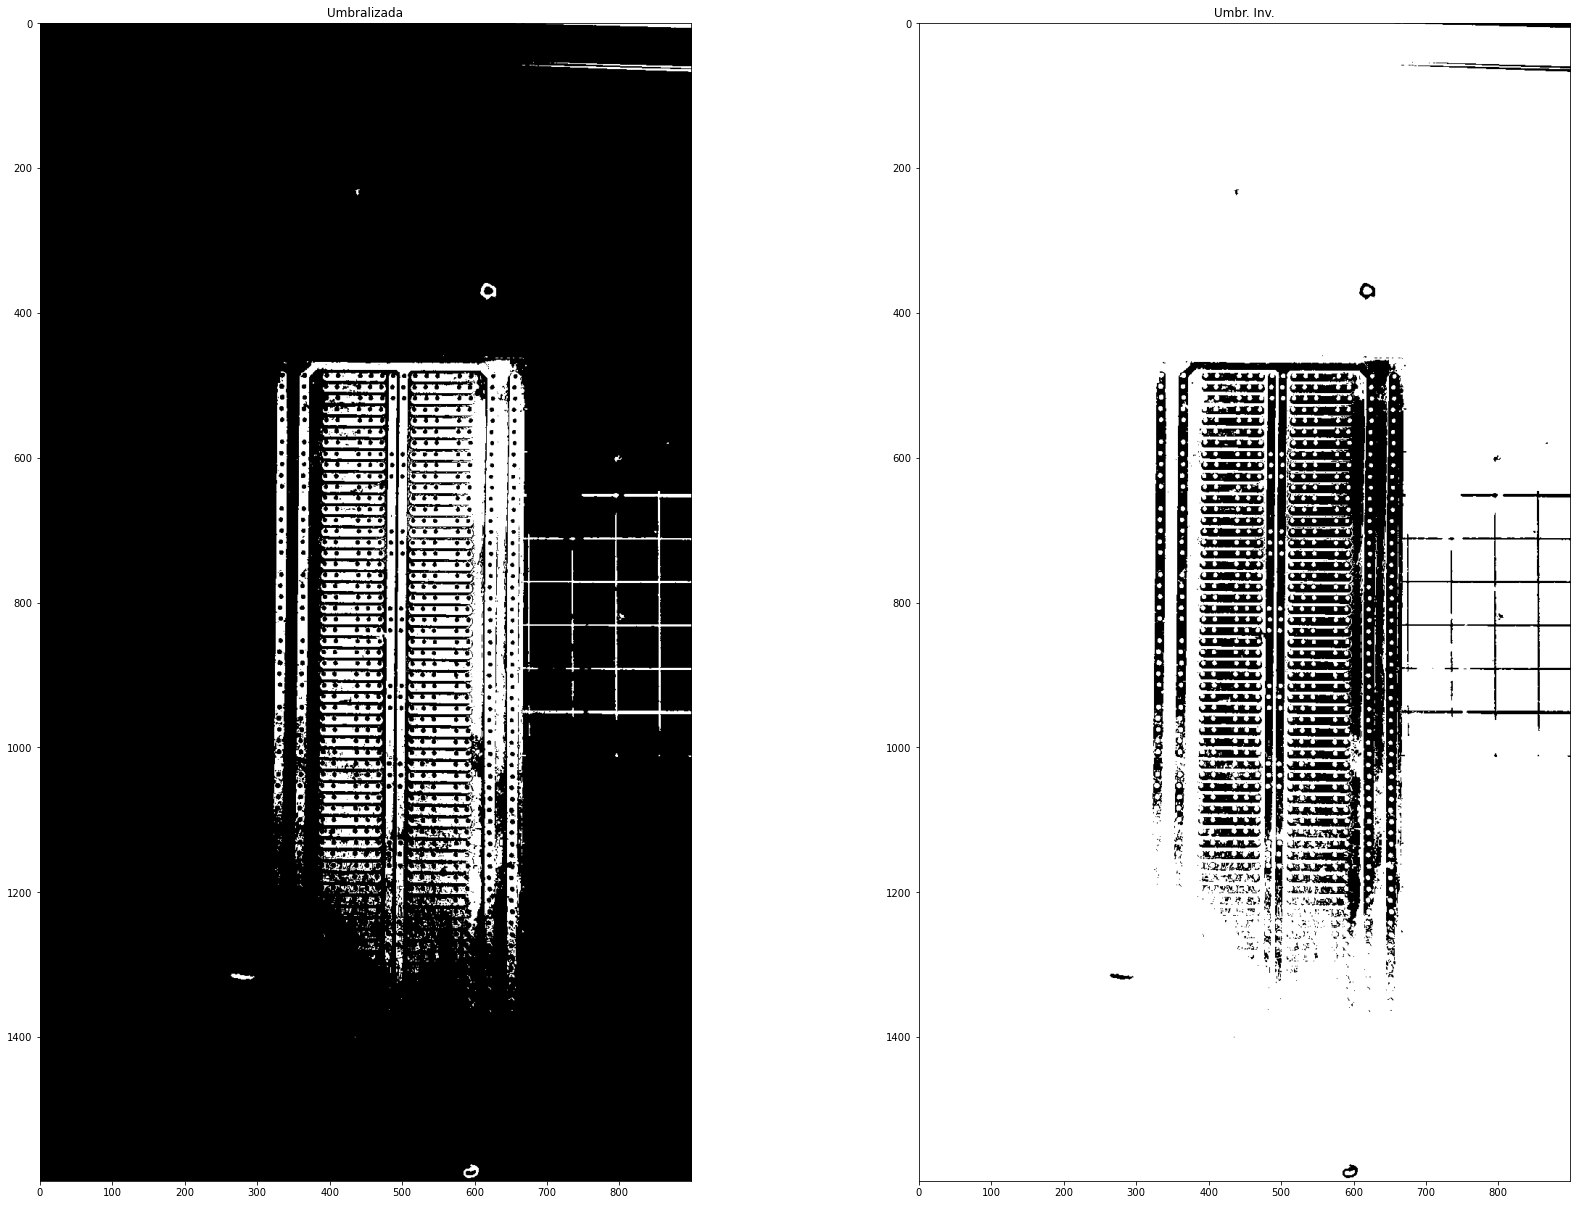

In [7]:
#Repitiendo OTSU

img5 = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
width, height = img5.shape[:2]
img_umbral5 = np.zeros((width,height), np.uint8)
img_umbral_inv5 = np.zeros((width,height), np.uint8)

#DIVISION POR UNA CONSTANTE
C5=5#Valor de la constante
IGMax5=0
IGmin5=1000000

#DIVISION POR UNA CONSTANTE
H5=160 #Valor de la constante

for i in range(width):
    for j in range(height):
        if img5[i,j] < H5: 
            img_umbral5[i,j] = 0
            img_umbral_inv5[i,j] = 255
        else : 
            img_umbral5[i,j] = 255
            img_umbral_inv5[i,j] = 0
        if img5[i,j] > IGMax5: IGMax5 = img5[i,j]
        if img5[i,j] < IGmin5: IGmin5 = img5[i,j]


#Visualizacion resulatado 
plt.figure(1,figsize=(25, 25))
plt.subplot(121), plt.imshow(img_umbral5, cmap='gray'), plt.title('Umbralizada')
plt.subplot(122), plt.imshow(img_umbral_inv5, cmap='gray'), plt.title('Umbr. Inv.')

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()

In [8]:
img5.shape

(1599, 899)

In [9]:
img6 = cv2.medianBlur(img5,1)

th2 = cv2.adaptiveThreshold(img6,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,9,8)
#Gaussiano
th3 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

nlbw = cv2.medianBlur(th2, 7)

blur = cv2.GaussianBlur(img2,(1,1),0)
ret3,th4 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(2,figsize=(25, 25))
plt.subplot(121), plt.imshow(th2, cmap='gray'), plt.title('Umbralizada')

error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/thresh.cpp:1674: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'adaptiveThreshold'


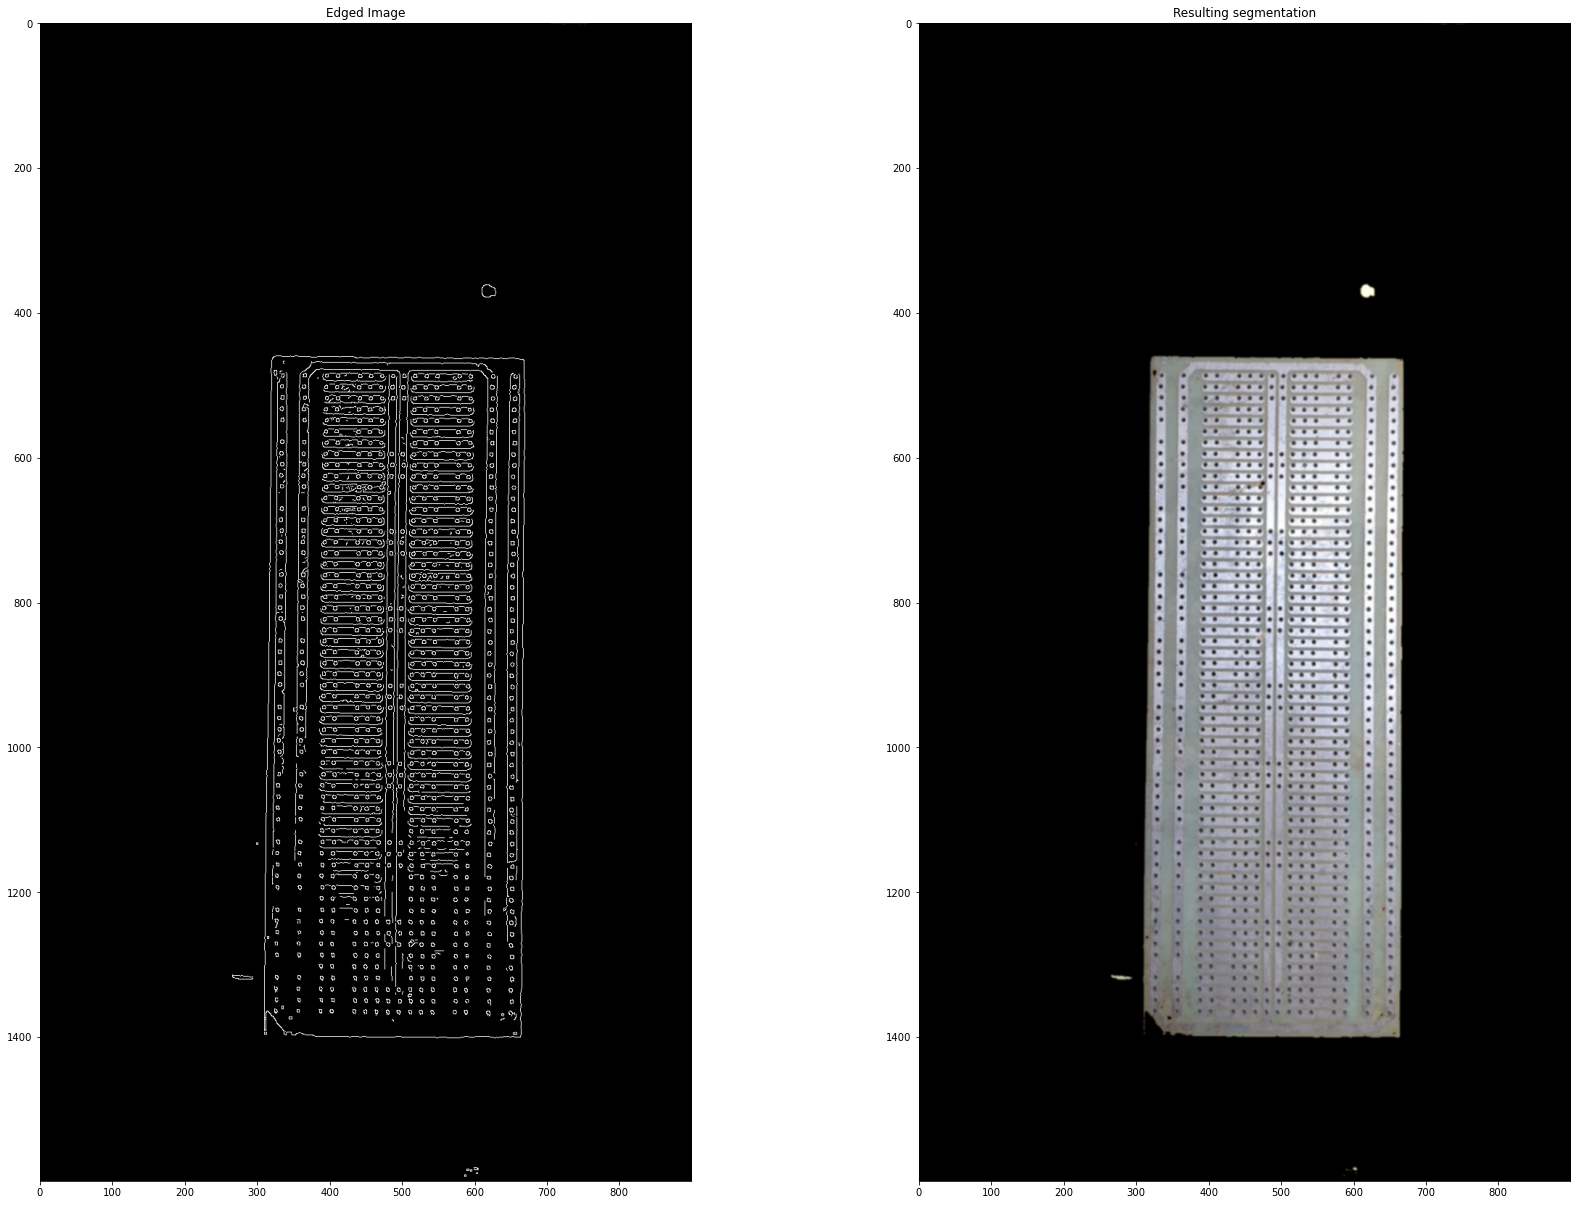

In [17]:
blur = cv2.GaussianBlur(bags_masked, (5,5), 0)
edges = cv2.Canny(blur,80,100)

#Visualizacion resulatado 
plt.figure(1,figsize=(25, 25))
plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edged Image')
plt.subplot(122), plt.imshow(blur, cmap='gray'), plt.title('Resulting segmentation')

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()